In [12]:
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import os
import math

#import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

This files takes all the columns we decided were not useful and dropped thems. It also drops all 'joint' accounts.

In [13]:
#Change File Name
df = pd.read_csv("Accepted.csv")
#df = pd.read_csv('Data\\FullData\\Accepted\\accepted_2007_to_2018Q4.csv')
#df.shape

In [14]:
#Drop all the joint accounts
df = df[df["application_type"]!="Joint App"]
df.shape


(1595875, 65)

In [15]:
Dropped_columns = ["addr_state",  "chargeoff_within_12_mths", "delinq_amnt",
                   "desc", "emp_title", "funded_amnt", "funded_amnt_inv", 
                  "id", "il_util", "last_credit_pull_d", "last_fico_range_high",
                  "last_fico_range_low", "member_id", "mo_sin_rcnt_rev_tl_op",
                  "mo_sin_rcnt_tl", "mths_since_last_major_derog", "mths_since_last_record",
                  "next_pymnt_d", "num_tl_30dpd", "num_tl_90g_dpd_24m", "num_tl_op_past_12m",
                  "out_prncp", "out_prncp_inv", "policy_code", "title", "total_acc",
                  "total_bal_ex_mort", "total_bc_limit", "total_pymnt_inv", "url", "zip_code",
                  "revol_bal_joint", "sec_app_fico_range_low", "sec_app_fico_range_high",  
                  "sec_app_earliest_cr_line",  "sec_app_inq_last_6mths",  "sec_app_mort_acc",  
                  "sec_app_open_acc",  "sec_app_revol_util",  "sec_app_open_act_il", 
                  "sec_app_num_rev_accts",  "sec_app_chargeoff_within_12_mths",  
                  "sec_app_collections_12_mths_ex_med",  "sec_app_mths_since_last_major_derog", 
                  "hardship_flag", "hardship_type", "hardship_reason", "hardship_status", 
                  "deferral_term", "hardship_amount", "hardship_start_date", "hardship_end_date", 
                  "payment_plan_start_date", "hardship_length", "hardship_dpd", "hardship_loan_status", 
                  "orig_projected_additional_accrued_interest", "hardship_payoff_balance_amount", 
                  "hardship_last_payment_amount", "disbursement_method", "debt_settlement_flag",
                  "debt_settlement_flag_date", "settlement_status", "settlement_date", 
                  "settlement_amount", "settlement_percentage", "settlement_term",
                  "dti_joint","annual_inc_joint","installment"
                  ]

In [ ]:
df =df.drop(columns=Dropped_columns)

In [6]:
df.shape

(2139991, 81)

In [7]:
# Create a new dataframe with 80% missing value retention
df = df.dropna(axis=1,thresh=int(0.80*len(df)))
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_il_high_credit_limit
0,3600.0,36 months,13.99,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,...,9.0,4.0,7.0,0.0,76.9,0.0,0.0,0.0,178050.0,13734.0
1,24700.0,36 months,11.99,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,...,27.0,5.0,22.0,0.0,97.4,7.7,0.0,0.0,314017.0,24667.0
3,35000.0,60 months,14.85,C,C5,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,...,13.0,5.0,13.0,0.0,100.0,0.0,0.0,0.0,381215.0,18000.0
4,10400.0,60 months,22.45,F,F1,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,...,19.0,6.0,12.0,0.0,96.6,60.0,0.0,0.0,439570.0,88097.0
5,11950.0,36 months,13.44,C,C3,4 years,RENT,34000.0,Source Verified,Dec-2015,...,4.0,3.0,5.0,0.0,100.0,100.0,0.0,0.0,16900.0,4000.0


In [8]:
# check for  null values 
for col in df.columns:
    print("{} : {}".format(col, df[col].isnull().sum()))

loan_amnt : 33
term : 33
int_rate : 33
grade : 33
sub_grade : 33
emp_length : 130390
home_ownership : 33
annual_inc : 37
verification_status : 33
issue_d : 33
loan_status : 33
pymnt_plan : 33
purpose : 33
dti : 33
delinq_2yrs : 62
earliest_cr_line : 62
fico_range_low : 33
fico_range_high : 33
inq_last_6mths : 63
open_acc : 62
pub_rec : 62
revol_bal : 33
revol_util : 1585
initial_list_status : 33
total_pymnt : 33
total_rec_prncp : 33
total_rec_int : 33
total_rec_late_fee : 33
recoveries : 33
collection_recovery_fee : 33
last_pymnt_d : 2331
last_pymnt_amnt : 33
collections_12_mths_ex_med : 178
application_type : 33
acc_now_delinq : 62
tot_coll_amt : 70309
tot_cur_bal : 70309
total_rev_hi_lim : 70309
acc_open_past_24mths : 50063
avg_cur_bal : 70369
bc_open_to_buy : 72078
bc_util : 73151
mo_sin_old_il_acct : 134912
mo_sin_old_rev_tl_op : 70310
mort_acc : 50063
mths_since_recent_bc : 70693
mths_since_recent_inq : 279351
num_accts_ever_120_pd : 70309
num_actv_bc_tl : 70309
num_actv_rev_tl : 

In [9]:
# Remove string characters in term and 'emp_length' column
df['term'] = df['term'].str.replace(r'\D', '')
df['emp_length'] = df['emp_length'].str.replace(r'\D', '')

In [10]:

# Drop the null rows 
df = df.dropna(axis=0)

In [11]:
# Change datatypes to INTs in the following columns
df.term = df.term.astype("int64") 
df.emp_length = df.emp_length.astype("int64") 

In [12]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_il_high_credit_limit
0,3600.0,36,13.99,C,C4,10,MORTGAGE,55000.0,Not Verified,Dec-2015,...,9.0,4.0,7.0,0.0,76.9,0.0,0.0,0.0,178050.0,13734.0
1,24700.0,36,11.99,C,C1,10,MORTGAGE,65000.0,Not Verified,Dec-2015,...,27.0,5.0,22.0,0.0,97.4,7.7,0.0,0.0,314017.0,24667.0
4,10400.0,60,22.45,F,F1,3,MORTGAGE,104433.0,Source Verified,Dec-2015,...,19.0,6.0,12.0,0.0,96.6,60.0,0.0,0.0,439570.0,88097.0
6,20000.0,36,9.17,B,B2,10,MORTGAGE,180000.0,Not Verified,Dec-2015,...,16.0,6.0,12.0,0.0,96.3,100.0,0.0,0.0,388852.0,46452.0
7,20000.0,36,8.49,B,B1,10,MORTGAGE,85000.0,Not Verified,Dec-2015,...,3.0,2.0,8.0,0.0,93.3,0.0,0.0,0.0,193390.0,36144.0


In [13]:
fontTitle = {'family': 'serif',
       'color': 'navy',
       'weight': 'bold',
       'size': 24}
fontLabel = {'family': 'serif',
       'color': 'navy',
       'weight': 'normal',
       'size': 16}

In [14]:
def plot_corr(df, size = 15, colorMap= 'Blues'):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))  
    im = ax.imshow(corr, cmap = colorMap)
    
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 90)
    plt.yticks(range(len(corr.columns)), corr.columns) 
    ax.set_title("Correlation Graph", fontdict = fontTitle)
    
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax = cax,  orientation='vertical')
    plt.show()


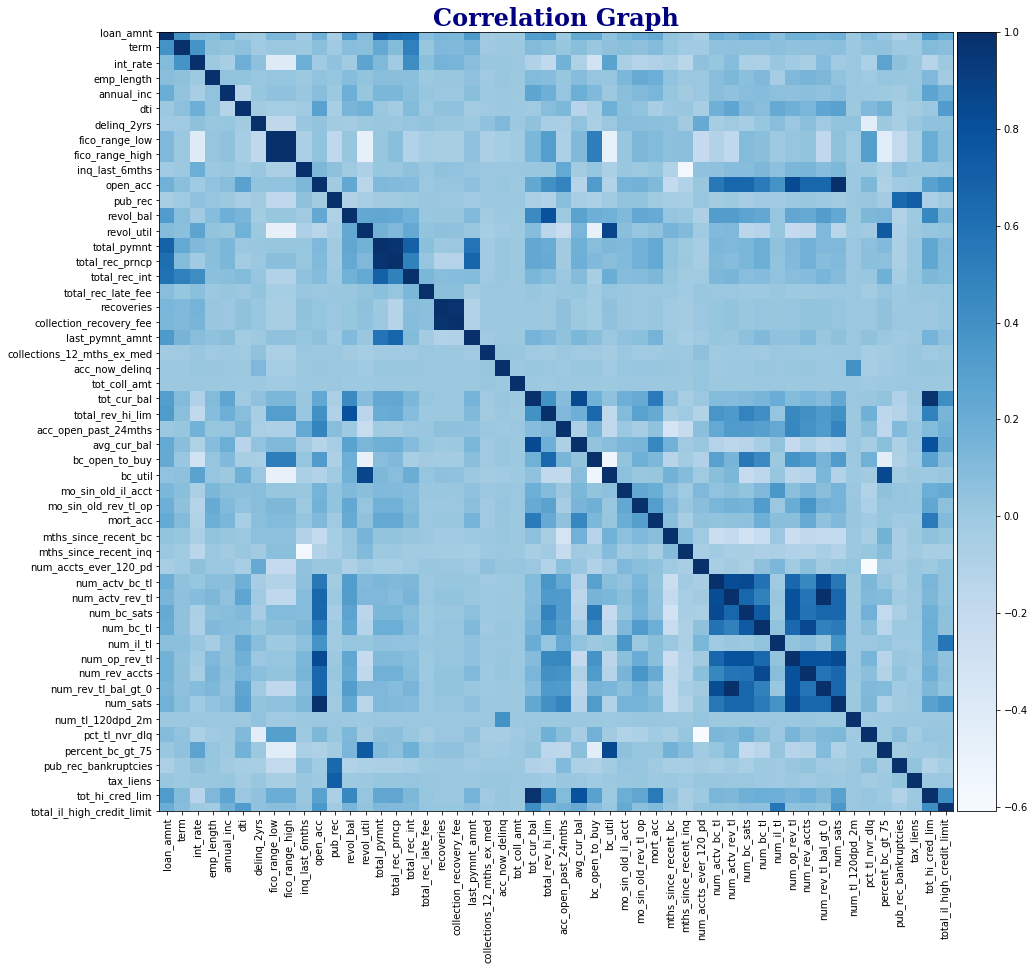

In [15]:
plot_corr(df, colorMap = 'Blues')

In [16]:
df =df.drop(columns=["fico_range_low", "open_acc", "total_rec_int","total_pymnt", "collection_recovery_fee", "num_actv_rev_tl" ])

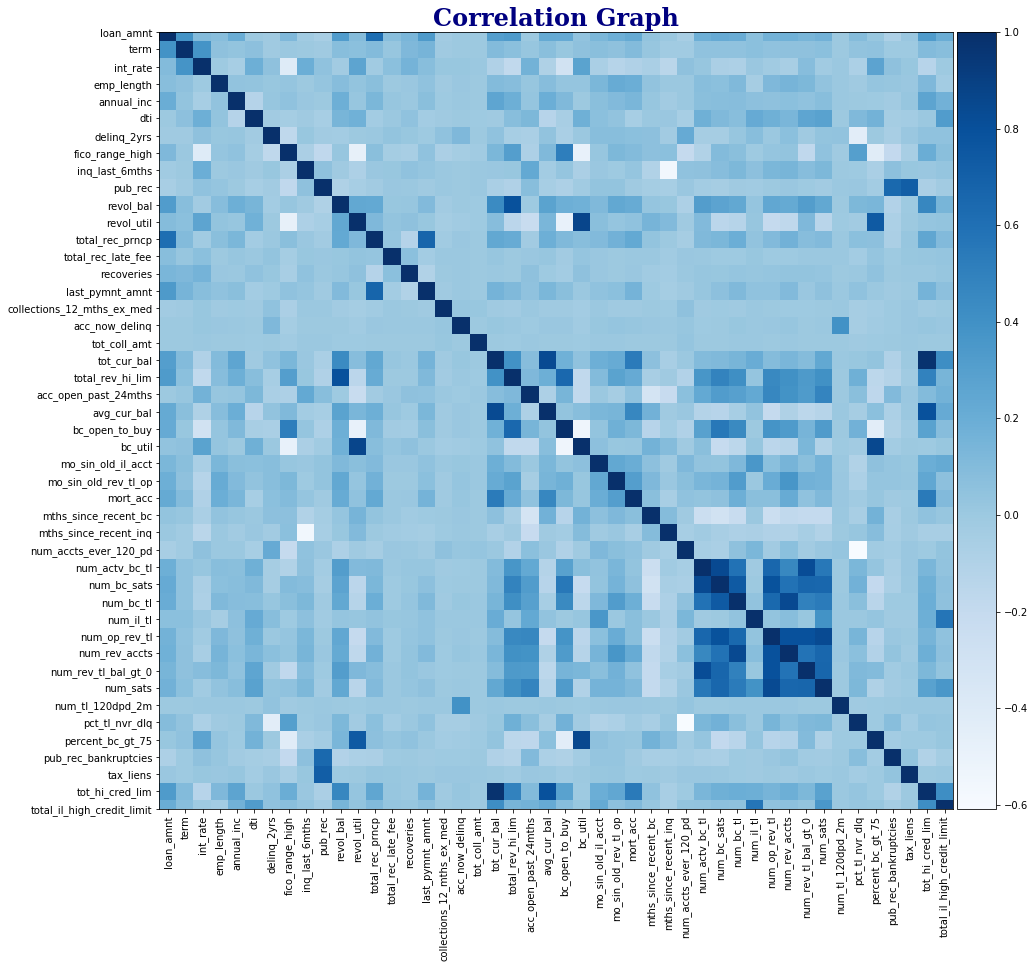

In [17]:
plot_corr(df)

In [18]:
df =df.drop(columns=["tot_hi_cred_lim", "percent_bc_gt_75", "total_rev_hi_lim" ])

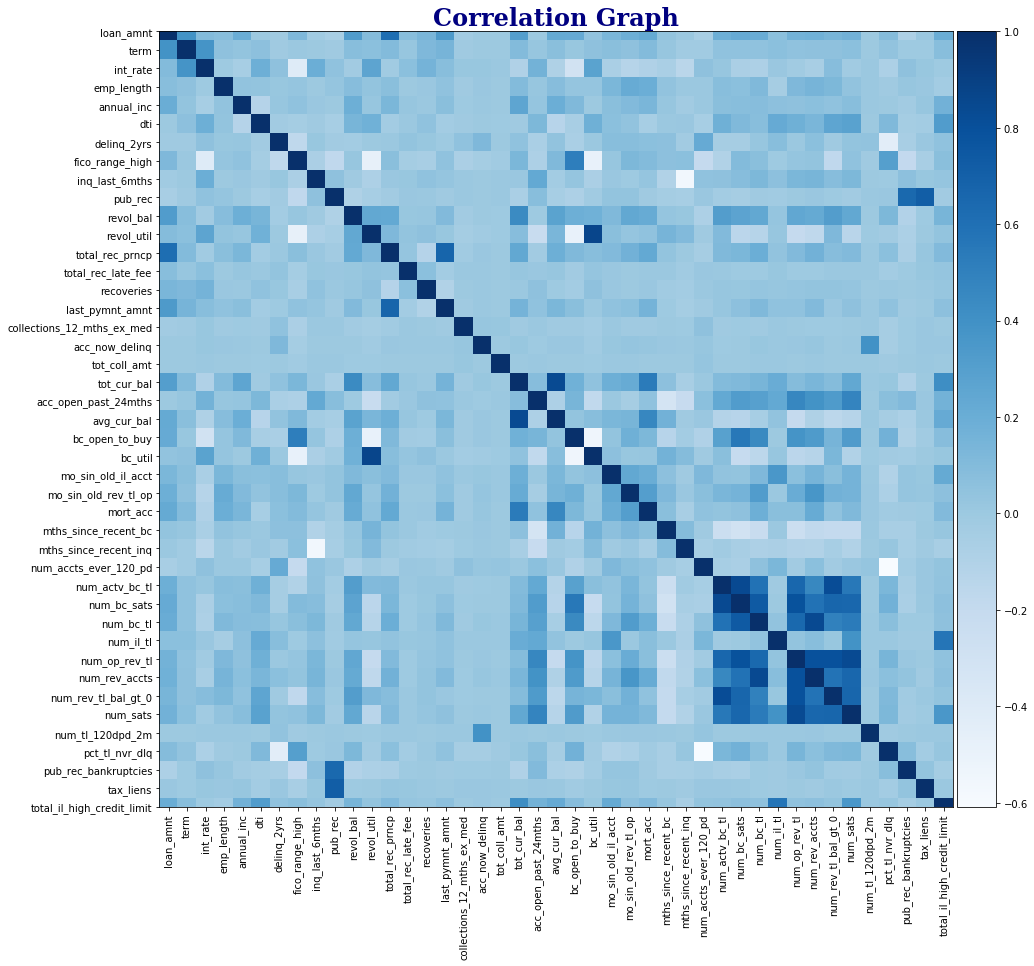

In [19]:
plot_corr(df)

In [20]:
df =df.drop(columns=["revol_util","num_op_rev_tl", "num_actv_bc_tl"])

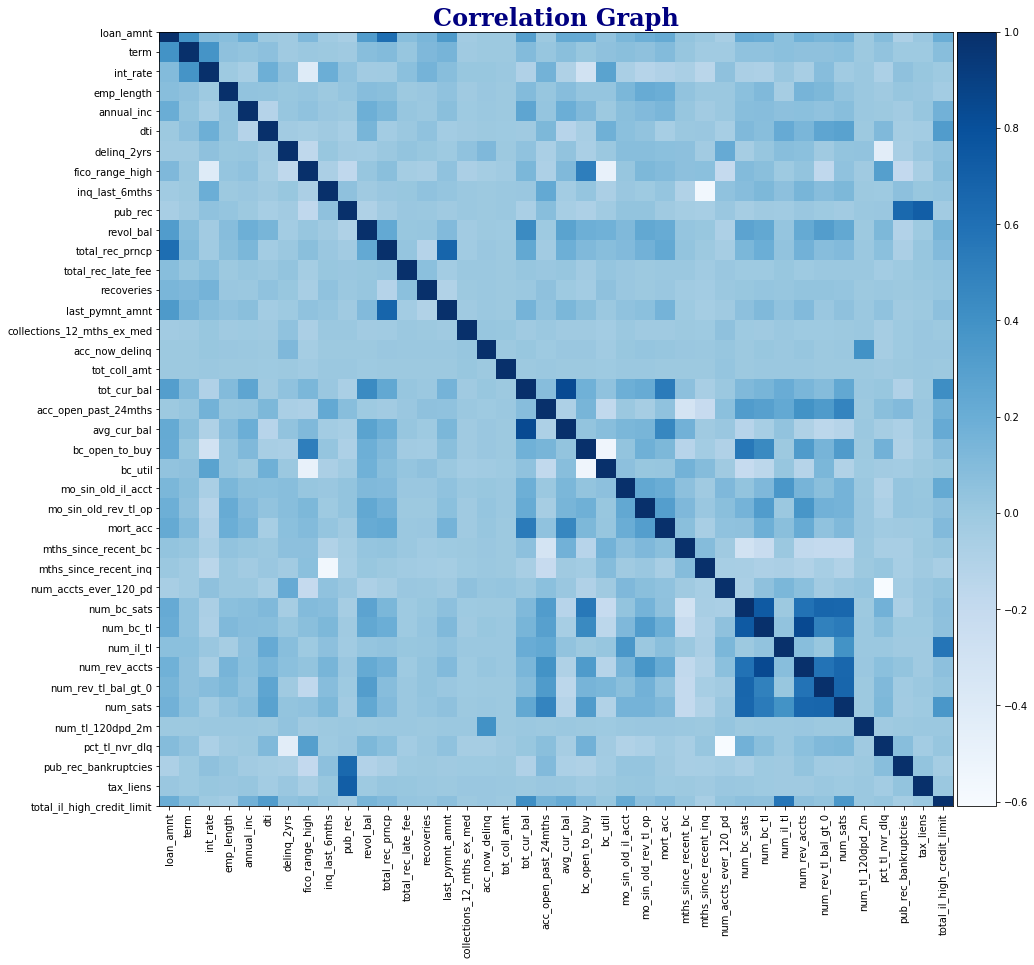

In [21]:
plot_corr(df)

In [24]:
df =df.drop(columns=["pub_rec"])

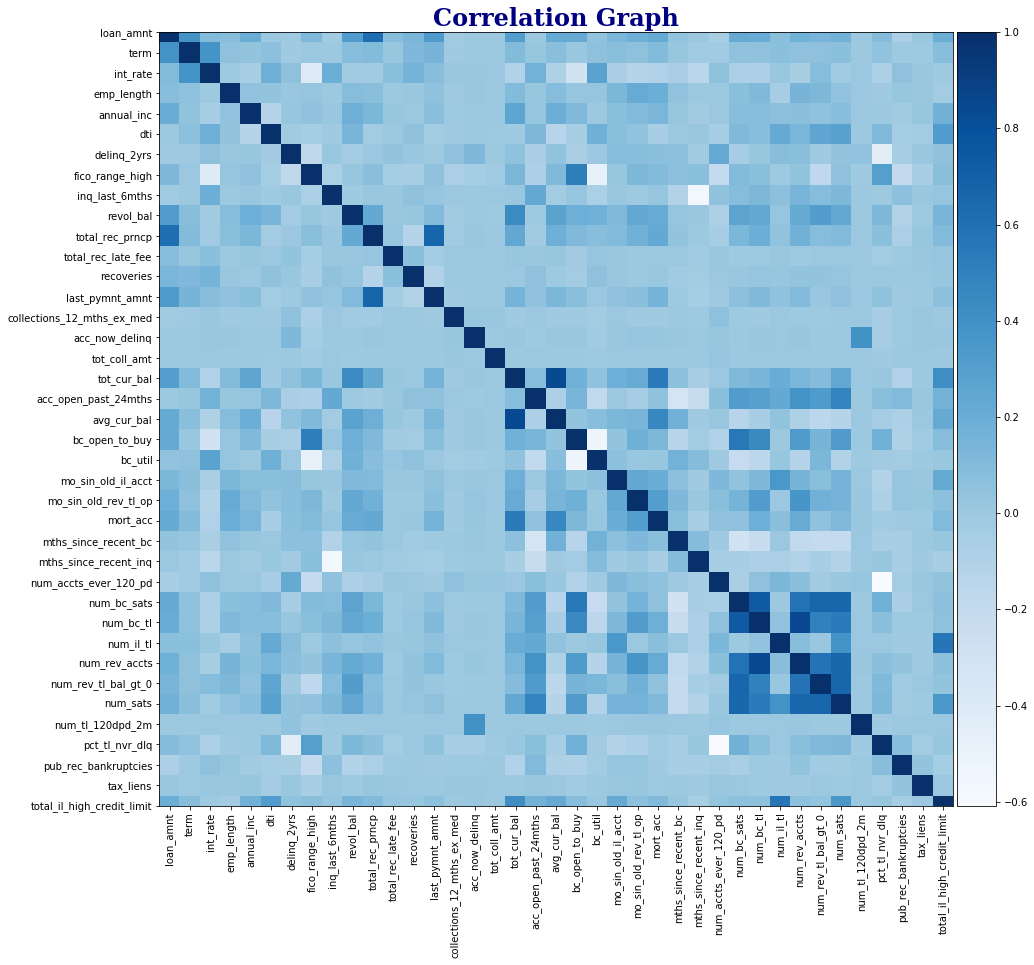

In [25]:
plot_corr(df)

In [26]:
df =df.drop(columns=["int_rate","sub_grade"])

In [27]:
dummy_columns = ["home_ownership", "application_type", "verification_status", "loan_status", "pymnt_plan", "purpose",'initial_list_status']
df = pd.get_dummies(df, columns=dummy_columns, drop_first = True)
df.head()

,loan_amnt,term,grade,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,fico_range_high,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,3600.0,36,C,10,55000.0,Dec-2015,5.91,0.0,Aug-2003,679.0,...,0,0,0,0,0,0,0,0,0,1
1,24700.0,36,C,10,65000.0,Dec-2015,16.06,1.0,Dec-1999,719.0,...,0,0,0,0,0,0,1,0,0,1
4,10400.0,60,F,3,104433.0,Dec-2015,25.37,1.0,Jun-1998,699.0,...,0,1,0,0,0,0,0,0,0,1
6,20000.0,36,B,10,180000.0,Dec-2015,14.67,0.0,Jun-1990,684.0,...,0,0,0,0,0,0,0,0,0,0
7,20000.0,36,B,10,85000.0,Dec-2015,17.61,1.0,Feb-1999,709.0,...,0,1,0,0,0,0,0,0,0,1


In [28]:
date_columns = ['issue_d','earliest_cr_line', 'last_pymnt_d', ]
df = df.drop(columns = date_columns)

In [29]:
df['grade']=df.grade.map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7})

In [ ]:
df.to_csv('Accepted.csv', index=False)